## Word2Vec Assignment

You MUST build on top of what we have coded in the class (to prevent anyone from just copying from the internet).

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

Name: Podchanan Rungthirakul

StudentID: st123460

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Load the data

I use my interested informations about jazz music as a corpus for the data in here.

In [3]:
import spacy
spacy.__version__

'3.4.2'

In [4]:
nlp = spacy.load("en_core_web_sm")

In [109]:
# put the informations of jazz music from Wikipedia in corpus
corpus = ["Jazz is a music genre that originated in the African-American communities of New Orleans, Louisiana, in the late 19th and early 20th centuries, with its roots in blues and ragtime.[1][2][3][4] Since the 1920s Jazz Age, it has been recognized as a major form of musical expression in traditional and popular music. Jazz is characterized by swing and blue notes, complex chords, call and response vocals, polyrhythms and improvisation. Jazz has roots in European harmony and African rhythmic rituals.",
         "As jazz spread around the world, it drew on national, regional, and local musical cultures, which gave rise to different styles. New Orleans jazz began in the early 1910s, combining earlier brass band marches, French quadrilles, biguine, ragtime and blues with collective polyphonic improvisation. But jazz did not begin as a single musical tradition in New Orleans or elsewhere. In the 1930s, arranged dance-oriented swing big bands, Kansas City jazz (a hard-swinging, bluesy, improvisational style), and gypsy jazz (a style that emphasized musette waltzes) were the prominent styles. Bebop emerged in the 1940s, shifting jazz from danceable popular music toward a more challenging 'musician's music' which was played at faster tempos and used more chord-based improvisation. Cool jazz developed near the end of the 1940s, introducing calmer, smoother sounds and long, linear melodic lines.",
         "The mid-1950s saw the emergence of hard bop, which introduced influences from rhythm and blues, gospel, and blues to small groups and particularly to saxophone and piano. Modal jazz developed in the late 1950s, using the mode, or musical scale, as the basis of musical structure and improvisation, as did free jazz, which explored playing without regular meter, beat and formal structures. Jazz-rock fusion appeared in the late 1960s and early 1970s, combining jazz improvisation with rock music's rhythms, electric instruments, and highly amplified stage sound. In the early 1980s, a commercial form of jazz fusion called smooth jazz became successful, garnering significant radio airplay. Other styles and genres abound in the 21st century, such as Latin and Afro-Cuban jazz.",
         "The origin of the word jazz has resulted in considerable research, and its history is well documented. It is believed to be related to jasm, a slang term dating back to 1860 meaning 'pep, energy'. The earliest written record of the word is in a 1912 article in the Los Angeles Times in which a minor league baseball pitcher described a pitch which he called a 'jazz ball' because it wobbles and you simply can't do anything with it."]

In [110]:
# 
corpus_tokenized = []
for i in range(len(corpus)):
    corpus_tokenized.append([str(token) for token in nlp([c for c in corpus][i])])

In [111]:
corpus_tokenized

[['Jazz',
  'is',
  'a',
  'music',
  'genre',
  'that',
  'originated',
  'in',
  'the',
  'African',
  '-',
  'American',
  'communities',
  'of',
  'New',
  'Orleans',
  ',',
  'Louisiana',
  ',',
  'in',
  'the',
  'late',
  '19th',
  'and',
  'early',
  '20th',
  'centuries',
  ',',
  'with',
  'its',
  'roots',
  'in',
  'blues',
  'and',
  'ragtime.[1][2][3][4',
  ']',
  'Since',
  'the',
  '1920s',
  'Jazz',
  'Age',
  ',',
  'it',
  'has',
  'been',
  'recognized',
  'as',
  'a',
  'major',
  'form',
  'of',
  'musical',
  'expression',
  'in',
  'traditional',
  'and',
  'popular',
  'music',
  '.',
  'Jazz',
  'is',
  'characterized',
  'by',
  'swing',
  'and',
  'blue',
  'notes',
  ',',
  'complex',
  'chords',
  ',',
  'call',
  'and',
  'response',
  'vocals',
  ',',
  'polyrhythms',
  'and',
  'improvisation',
  '.',
  'Jazz',
  'has',
  'roots',
  'in',
  'European',
  'harmony',
  'and',
  'African',
  'rhythmic',
  'rituals',
  '.'],
 ['As',
  'jazz',
  'spread',
  

In [112]:
#2. numericalize

#2.1 get all the unique words
#we want to flatten this (basically merge all list)
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))  
#vocabs is a term defining all unique words your system know

In [113]:
#2.2 assign id to all these vocabs
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [114]:
word2index['jazz']

61

In [115]:
word2index['instruments']

258

In [116]:
#add <UNK>, which is a very normal token exists in the world
vocabs.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything

In [117]:
#now we have a way to know what is the id of <UNK>
word2index['<UNK>'] = 0  #I set <UNK> as 0

In [118]:
#create index2word dictionary
#2 min    
index2word = {v:k for k, v in word2index.items()}

index2word

{0: '<UNK>',
 1: 'complex',
 2: 'call',
 3: 'But',
 4: 'gospel',
 5: 'stage',
 6: 'piano',
 7: 'article',
 8: ',',
 9: 'ball',
 10: 'traditional',
 11: 'in',
 12: 'Since',
 13: 'major',
 14: 'gypsy',
 15: 'calmer',
 16: 'polyrhythms',
 17: 'not',
 18: 'polyphonic',
 19: 'regular',
 20: '(',
 21: 'genres',
 22: 'you',
 23: 'explored',
 24: 'he',
 25: 'the',
 26: 'became',
 27: 'beat',
 28: 'bluesy',
 29: 'developed',
 30: 'a',
 31: 'did',
 32: 'bop',
 33: 'highly',
 34: 'styles',
 35: 'it',
 36: 'pitcher',
 37: 'emphasized',
 38: 'improvisational',
 39: 'well',
 40: '1980s',
 41: 'smooth',
 42: 'slang',
 43: 'dating',
 44: 'electric',
 45: 'mode',
 46: 'pep',
 47: 'mid-1950s',
 48: 'end',
 49: 'toward',
 50: 'recognized',
 51: 'from',
 52: 'Orleans',
 53: 'appeared',
 54: 'playing',
 55: 'response',
 56: 'improvisation',
 57: "'",
 58: 'ca',
 59: 'Angeles',
 60: 'blues',
 61: 'jazz',
 62: '1910s',
 63: 'rise',
 64: 'used',
 65: '.',
 66: 'blue',
 67: 'Jazz',
 68: 'century',
 69: 'believ

In [119]:
vocabs

['In',
 'complex',
 'call',
 'But',
 'gospel',
 'stage',
 'piano',
 'article',
 ',',
 'ball',
 'traditional',
 'in',
 'Since',
 'major',
 'gypsy',
 'calmer',
 'polyrhythms',
 'not',
 'polyphonic',
 'regular',
 '(',
 'genres',
 'you',
 'explored',
 'he',
 'the',
 'became',
 'beat',
 'bluesy',
 'developed',
 'a',
 'did',
 'bop',
 'highly',
 'styles',
 'it',
 'pitcher',
 'emphasized',
 'improvisational',
 'well',
 '1980s',
 'smooth',
 'slang',
 'dating',
 'electric',
 'mode',
 'pep',
 'mid-1950s',
 'end',
 'toward',
 'recognized',
 'from',
 'Orleans',
 'appeared',
 'playing',
 'response',
 'improvisation',
 "'",
 'ca',
 'Angeles',
 'blues',
 'jazz',
 '1910s',
 'rise',
 'used',
 '.',
 'blue',
 'Jazz',
 'century',
 'believed',
 'Modal',
 'New',
 'Times',
 'dance',
 'ragtime.[1][2][3][4',
 'energy',
 'abound',
 '1960s',
 'do',
 'radio',
 'earliest',
 'particularly',
 'more',
 'faster',
 'structures',
 'saw',
 'was',
 'be',
 'African',
 'rhythmic',
 'Louisiana',
 'saxophone',
 'arranged',
 't

## Prepare the data

In [120]:

#use window_size = 2 as the assignment's instruction.

skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    for i in range(2, len(sent)-2): #start from 2 to second last
        center_word = sent[i]
        outside_words = [sent[i-2], sent[i+2]]  #window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams[:30]

[['a', 'Jazz'],
 ['a', 'genre'],
 ['music', 'is'],
 ['music', 'that'],
 ['genre', 'a'],
 ['genre', 'originated'],
 ['that', 'music'],
 ['that', 'in'],
 ['originated', 'genre'],
 ['originated', 'the'],
 ['in', 'that'],
 ['in', 'African'],
 ['the', 'originated'],
 ['the', '-'],
 ['African', 'in'],
 ['African', 'American'],
 ['-', 'the'],
 ['-', 'communities'],
 ['American', 'African'],
 ['American', 'of'],
 ['communities', '-'],
 ['communities', 'New'],
 ['of', 'American'],
 ['of', 'Orleans'],
 ['New', 'communities'],
 ['New', ','],
 ['Orleans', 'of'],
 ['Orleans', 'Louisiana'],
 [',', 'New'],
 [',', ',']]

In [121]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent 
        for i in range(2, len(sent) - 2): #start from 2 to the third last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-2]], word2index[sent[i+2]]]  #window_size = 2
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [122]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[ 52],
       [ 51],
       [180],
       [ 30],
       [ 67],
       [ 25],
       [195],
       [224],
       [109],
       [ 56]])


## Unigram distribution

In [123]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
# word_count # Showing word count

In [124]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

496

In [125]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
# Counter(unigram_table)

## 4. Negative sampling

In [126]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [127]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

In [128]:
batch_size = 2
input_batch, label_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[ 25],
        [136]]),
 array([[ 29],
        [174]]))

In [129]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [130]:
num_neg = 5 
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [131]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 5])

## 5. Model

In [132]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, centre_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embbed  = self.embedding_center_word(centre_words)    #(batch_size, 1, emb_size)
        outside_embbed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embbed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embbed.bmm(center_embbed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embbed.bmm(center_embbed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  
#scalar, loss should be scalar, to call backward()

In [133]:
input, label = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [134]:
emb_size = 20 
voc_size = len(vocabs)
model = SkipgramNeg(voc_size, emb_size)

In [135]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [136]:
neg_tensor

tensor([[214,  37, 123, 130, 183],
        [ 72, 189, 149, 235, 229]])

In [137]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [138]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(0.3351, grad_fn=<NegBackward0>)

## 6. Training

In [139]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 20
model      = SkipgramNeg(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [140]:
num_epochs = 6000

for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 0.083466 | Time: ??
Epoch 2000 | Loss: 0.018716 | Time: ??
Epoch 3000 | Loss: 13.217049 | Time: ??
Epoch 4000 | Loss: 0.000002 | Time: ??
Epoch 5000 | Loss: 0.000000 | Time: ??
Epoch 6000 | Loss: 0.000000 | Time: ??


## 7. Plot the embeddings

In [141]:
jazz = torch.LongTensor([word2index['jazz']])
jazz

tensor([61])

In [142]:
instruments = torch.LongTensor([word2index['instruments']])
instruments

tensor([258])

In [143]:
jazz_center_embbed = model.embedding_center_word(jazz)
jazz_outside_embbed = model.embedding_outside_word(jazz)
jazz_embbed = (jazz_center_embbed + jazz_outside_embbed) / 2
jazz_embbed

tensor([[-2.4010,  3.1948, -0.4104,  0.0059,  3.4403, -0.3064,  1.3744,  0.4962,
         -2.6488,  1.2626, -0.5866,  1.7677,  0.6779,  3.0095, -0.4107, -0.9519,
         -1.4897,  1.3684,  2.6857,  1.6247]], grad_fn=<DivBackward0>)

In [144]:
def get_embbed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embbed  = model.embedding_center_word(word)
    outside_embbed = model.embedding_outside_word(word)
    
    embbed = (center_embbed + outside_embbed) / 2
    
    return  embbed[0][0].item(), embbed[0][1].item()

In [145]:
print(get_embbed('jazz'))

(-2.40100359916687, 3.194769859313965)


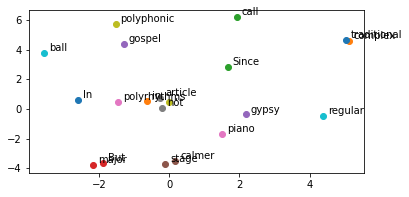

In [146]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embbed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Try CBOW

In [147]:
#delete duplicate word define as vocabs, also include unknow as <UNK>.
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))
vocabs.append('<UNK>') # to let '<UNK>' become the last.

In [148]:
word2index = {v: idx+1 for idx, v in enumerate(vocabs)} #plus one to shift value in word index to assign <UNK>'s value to 0 without duplication with others.
word2index['<UNK>'] = 0

#Let check word to index's value
word2index["jazz"]

62

In [149]:
# create index to word
index2word = {v:k for k, v in word2index.items()}

index2word[68]

'Jazz'

## Prepare the data

In [150]:
cbow = []

#for each corpus
for sent in corpus_tokenized:
    #for each sent 
    for i in range(2, len(sent) - 2): # start from 1 to second last but we use window size of 2, then first centre word should be at index 2
        center_word = sent[i]
        ooutside_words = [sent[i-2], sent[i+2]]  #window_size = 2
        for o in outside_words:
            cbow.append([center_word, o])

cbow[:30]

[['a', 'do'],
 ['a', '.'],
 ['music', 'do'],
 ['music', '.'],
 ['genre', 'do'],
 ['genre', '.'],
 ['that', 'do'],
 ['that', '.'],
 ['originated', 'do'],
 ['originated', '.'],
 ['in', 'do'],
 ['in', '.'],
 ['the', 'do'],
 ['the', '.'],
 ['African', 'do'],
 ['African', '.'],
 ['-', 'do'],
 ['-', '.'],
 ['American', 'do'],
 ['American', '.'],
 ['communities', 'do'],
 ['communities', '.'],
 ['of', 'do'],
 ['of', '.'],
 ['New', 'do'],
 ['New', '.'],
 ['Orleans', 'do'],
 ['Orleans', '.'],
 [',', 'do'],
 [',', '.']]

In [151]:
def random_batch(batch_size, corpus):
    
    cbow = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent 
        for i in range(2, len(sent) - 2): #start from 2 to the third last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-2]], word2index[sent[i+2]]]  #window_size = 2
            for o in outside_words:
                cbow.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([cbow[index][0]])  
        random_labels.append([cbow[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [152]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[191],
       [ 72],
       [184],
       [ 26],
       [ 62],
       [145],
       [ 62],
       [219],
       [232],
       [220]])


## Unigram distribution

In [153]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))

In [154]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

496

In [155]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)

## Negative sampling

In [161]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [162]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

In [166]:
batch_size = 2
label_batch, input_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[242],
        [207]]),
 array([[ 87],
        [217]]))

In [167]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [168]:
num_neg = 5  # same as the first part
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [169]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 5])

## Model

In [189]:
# get inspired from https://github.com/jeffchy/pytorch-word-embedding/blob/master/CBOW.py

class cbow(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(cbow, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [190]:
label, input = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [198]:
emb_size = 20 # I will try on 10.
voc_size = len(vocabs)
model = cbow(voc_size, emb_size)

In [199]:
emb_size

20

In [200]:
voc_size

260

In [201]:
model

cbow(
  (embedding_center_word): Embedding(260, 20)
  (embedding_outside_word): Embedding(260, 20)
  (logsigmoid): LogSigmoid()
)

In [202]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [203]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [204]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(4.2389, grad_fn=<NegBackward0>)

## Training

In [205]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 20
model      = cbow(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [207]:
num_epochs = 6000

for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 0.233925 | Time: ??
Epoch 2000 | Loss: 7.508681 | Time: ??
Epoch 3000 | Loss: 0.070010 | Time: ??
Epoch 4000 | Loss: 5.630754 | Time: ??
Epoch 5000 | Loss: 0.195231 | Time: ??
Epoch 6000 | Loss: 3.593274 | Time: ??


## Plot the embeddings

In [208]:
jazz = torch.LongTensor([word2index['jazz']])
jazz

tensor([62])

In [209]:
jazz_center_embed = model.embedding_center_word(jazz)
jazz_outside_embed = model.embedding_outside_word(jazz)

jazz_embed = (jazz_center_embed + jazz_outside_embed) / 2
jazz_embed

tensor([[ 1.2338,  1.8505, -1.8910, -1.2973, -2.3492,  0.9194,  2.0037, -1.2225,
         -1.0840,  0.4486,  0.3974,  3.6306,  0.4396,  1.9373, -0.8980, -0.6599,
         -1.0953,  1.9911,  1.0350, -0.1054]], grad_fn=<DivBackward0>)

In [210]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [211]:
print(get_embed('jazz'))

(1.2337605953216553, 1.8505382537841797)


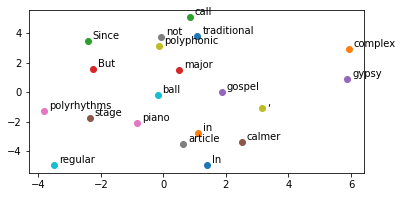

In [212]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()